In [155]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns

In [156]:
mat_df = pd.read_csv('./student-mat.csv', sep=';')
por_df = pd.read_csv('./student-por.csv', sep=';')
mat_df.insert(1, 'class', 'mat')
por_df.insert(1, 'class', 'por')
df_train = pd.concat([mat_df, por_df], axis=0)
df_train.drop(['G1', 'G2'], inplace=True, axis=1)

In [157]:
df_train['school'] = df_train['school'].map({'GP':1,'MS':2})
df_train['class'] = df_train['class'].map({'por':1,'mat':2})
df_train['sex'] = df_train['sex'].map({'F':1,'M':2})
df_train['address'] = df_train['address'].map({'U':1,'R':2})
df_train['famsize'] = df_train['famsize'].map({'GT3':1,'LE3':2})
df_train['Pstatus'] = df_train['Pstatus'].map({'T':1,'A':2})
df_train['Mjob'] = df_train['Mjob'].map({'other':1,'services':2,'at_home':3,'teacher':4,'health':5})
df_train['Fjob'] = df_train['Fjob'].map({'other':1,'services':2,'teacher':3,'at_home':4,'health':5})
df_train['reason'] = df_train['reason'].map({'course':1,'reputation':2,'home':3,'other':4})
df_train['guardian'] = df_train['guardian'].map({'mother':1,'father':2,'other':3})
df_train['schoolsup'] = df_train['schoolsup'].replace('yes',1).replace('no',2)
df_train['famsup'] = df_train['famsup'].replace('yes',1).replace('no',2)
df_train['paid'] = df_train['paid'].replace('yes',1).replace('no',2)
df_train['activities'] = df_train['activities'].replace('yes',1).replace('no',2)
df_train['nursery'] = df_train['nursery'].replace('yes',1).replace('no',2)
df_train['higher'] = df_train['higher'].replace('yes',1).replace('no',2)
df_train['internet'] = df_train['internet'].replace('yes',1).replace('no',2)
df_train['romantic'] = df_train['romantic'].replace('yes',1).replace('no',2)

df_train.drop(['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic'], inplace=True, axis=1)

df_train['G3'] = df_train['G3'].map(lambda x: 1 if x >= 15 else 0)

In [158]:
for col in df_train.columns:
    print(col, df_train[col].unique())

school [1 2]
class [2 1]
sex [1 2]
age [18 17 15 16 19 22 20 21]
address [1 2]
famsize [1 2]
Pstatus [2 1]
Medu [4 1 3 2 0]
Fedu [4 1 2 3 0]
Mjob [3 5 1 2 4]
Fjob [3 1 2 5 4]
reason [1 4 3 2]
guardian [1 2 3]
traveltime [2 1 3 4]
studytime [2 3 1 4]
failures [0 3 2 1]
higher [1 2]
famrel [4 5 3 1 2]
freetime [3 2 4 1 5]
goout [4 3 2 1 5]
Dalc [1 2 5 3 4]
Walc [1 3 2 4 5]
health [3 5 1 2 4]
absences [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17 32]
G3 [0 1]


In [159]:
X_train = df_train.drop(['G3'], axis=1).values
y_train = df_train['G3'].values

In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

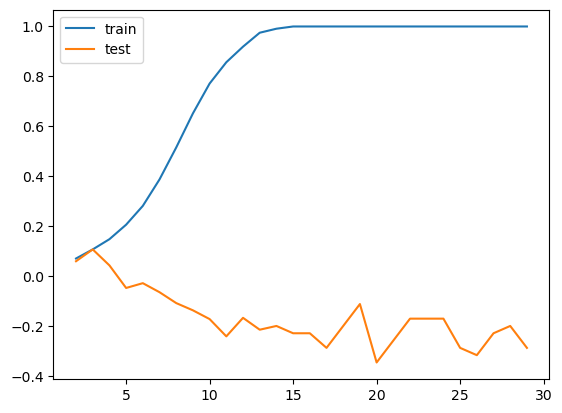

In [161]:
# k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

r = range(2,30)
for i in r:
    desc_tree_reg = DecisionTreeRegressor(max_depth=i, criterion='squared_error')
    desc_tree_reg.fit(X_train, y_train)
    train_scores.append(desc_tree_reg.score(X_train, y_train))
    test_scores.append(desc_tree_reg.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.plot(r, train_scores, label='train')
plt.plot(r, test_scores, label='test')
plt.legend()
plt.show()

In [162]:

# train_scores = []
# test_scores = []
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# r = range(2,200)
# for i in r:
#     rand_forest = RandomForestRegressor(n_estimators=i, criterion='squared_error')
#     rand_forest.fit(X_train, y_train)
#     train_scores.append(rand_forest.score(X_train, y_train))
#     test_scores.append(rand_forest.score(X_test, y_test))

# plt.plot(r, train_scores, label='train')
# plt.plot(r, test_scores, label='test')
# plt.legend()
# plt.show()

In [163]:

train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.score(X_train, y_train))
print(lin_reg.score(X_test, y_test))

0.13002931876500545
0.05625422842370853


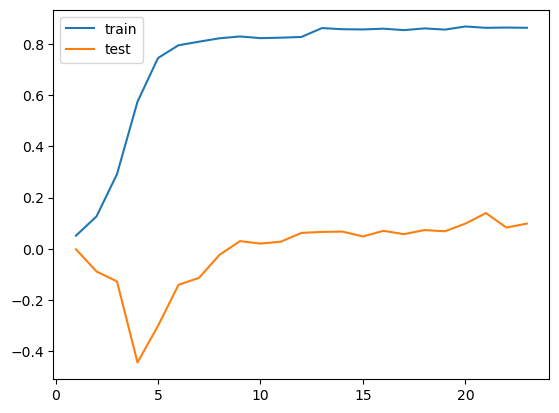

In [164]:
# wrapper
from sklearn.feature_selection import RFE
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

for i in range(1, X_train.shape[1]):
    rfe = RFE(estimator=RandomForestRegressor(n_estimators=61, criterion='squared_error'), n_features_to_select=i)
    fit = rfe.fit(X_train, y_train)
    train_scores.append(fit.score(X_train, y_train))
    test_scores.append(fit.score(X_test, y_test))

plt.plot(range(1, X_train.shape[1]), train_scores, label='train')
plt.plot(range(1, X_train.shape[1]), test_scores, label='test')
plt.legend()
plt.show()



In [165]:
max_index = test_scores.index(max(test_scores))
print(max_index, test_scores[max_index])
print(max_index-1, test_scores[max_index-1])
print(max_index+1, test_scores[max_index+1])

20 0.1398376885141197
19 0.09885669960246679
21 0.08326229333687007


In [166]:
best_rfe = RFE(estimator=RandomForestRegressor(n_estimators=61, criterion='squared_error'), n_features_to_select=max_index)
best_score = best_rfe.fit(X_train, y_train).score(X_test, y_test)

for n_features in range(max_index-2,max_index+3):
    for tries in range(0,5):
        rfe = RFE(estimator=RandomForestRegressor(n_estimators=61, criterion='squared_error'), n_features_to_select=n_features)
        score = rfe.fit(X_train, y_train).score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_rfe = rfe

print(best_score)

0.13831770889685424


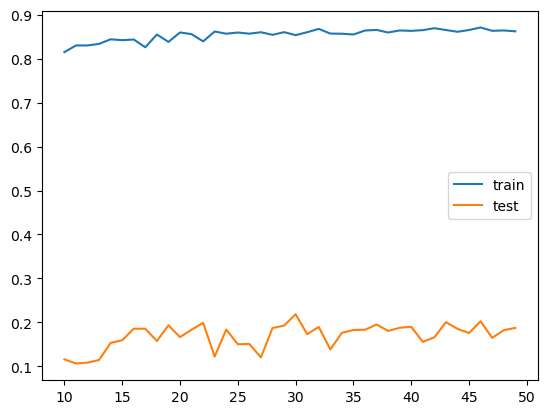

In [167]:
new_X = rfe.transform(df_train.drop(['G3'], axis=1).values)
new_Y = df_train['G3'].values
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

r = range(10,50)
for i in r:
    rand_forest = RandomForestRegressor(n_estimators=i, criterion='squared_error')
    rand_forest.fit(X_train, y_train)
    train_scores.append(rand_forest.score(X_train, y_train))
    test_scores.append(rand_forest.score(X_test, y_test))

plt.plot(r, train_scores, label='train')
plt.plot(r, test_scores, label='test')
plt.legend()
plt.show()

In [168]:
print(max(test_scores))

0.21848665981756488


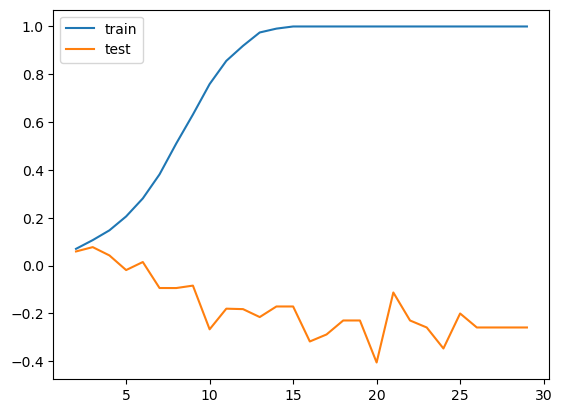

In [169]:
train_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(new_X, new_Y, test_size=0.2, random_state=42)

r = range(2,30)
for i in r:
    desc_tree_reg = DecisionTreeRegressor(max_depth=i, criterion='squared_error')
    desc_tree_reg.fit(X_train, y_train)
    train_scores.append(desc_tree_reg.score(X_train, y_train))
    test_scores.append(desc_tree_reg.score(X_test, y_test))
    
import matplotlib.pyplot as plt
plt.plot(r, train_scores, label='train')
plt.plot(r, test_scores, label='test')
plt.legend()
plt.show()


In [181]:
# multidiomensional scaling
from sklearn.manifold import MDS

correlation_matrix = np.corrcoef(new_X.T)

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
x_transfromed = mds.fit_transform(correlation_matrix)


ValueError: 'c' argument has 835 elements, which is inconsistent with 'x' and 'y' with size 22.

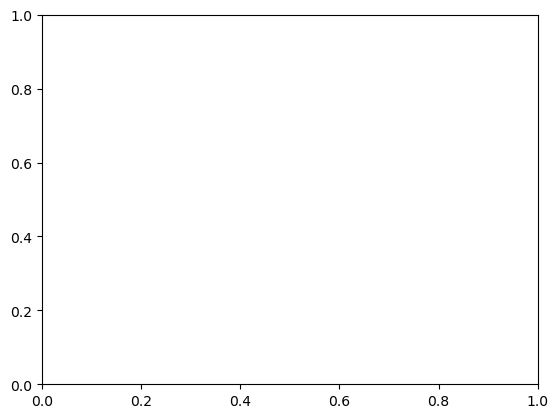

In [182]:
color_map = {0:'red', 1:'green'}
plt.scatter(x_transfromed[:,0], x_transfromed[:,1], c=[color_map[i] for i in y_train])
plt.show()